<h1>Project Code<h1>

<h3>EDA & Data Processing<h3>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
# load datasets
contestants = pd.read_csv('contestants.csv')
episodes = pd.read_csv('episodes.csv')

<h4> Contestants EDA <h4>

In [3]:
# numerical columns: Season, Age
contestants.head()

,Show,Season,Name,Age,Hometown,Job,Eliminated
0,The Bachelor,1,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,Winner
1,The Bachelor,1,Trista Rehn,29.0,"Miami, Florida",Miami Heat Dancer,Runner-up
2,The Bachelor,1,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,Week 5
3,The Bachelor,1,Kim,24.0,"Tempe, Arizona",Nanny,Week 4
4,The Bachelor,1,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,Week 3


In [4]:
#get num NA values in contestants
contestants.isna().sum()

Show          0
Season        0
Name          0
Age           1
Hometown      0
Job           0
Eliminated    0
dtype: int64

In [5]:
#relatively small amount - drop rows with NA
contestants = contestants.dropna()

In [6]:
# look at the description of the numerical columns
contestants.describe()

,Season,Age
count,907.000000,907.000000
mean,11.866593,27.447630
std,6.591256,3.154285
min,1.000000,21.000000
25%,6.000000,25.000000
50%,12.000000,27.000000
75%,17.000000,29.000000
max,24.000000,42.000000


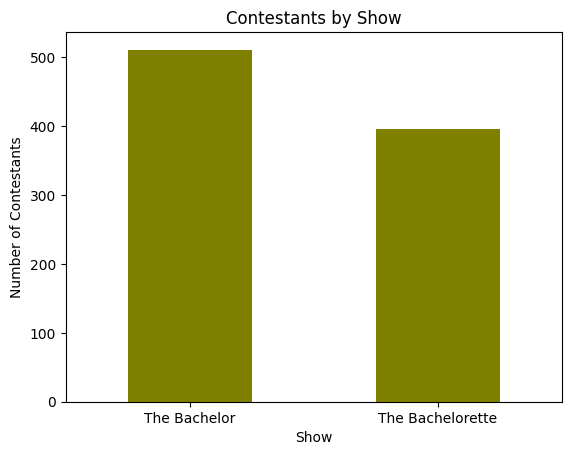

In [42]:
# look at categorical columns for contestants
# categorical columns: Show, Name, Hometown, Job, Eliminated

# plot Show to see the distribution of contestants
contestants['Show'].value_counts().plot(kind='bar', color='olive')
plt.title("Contestants by Show")
plt.ylabel("Number of Contestants")
plt.xlabel("Show")
plt.xticks(rotation=0)
plt.show()

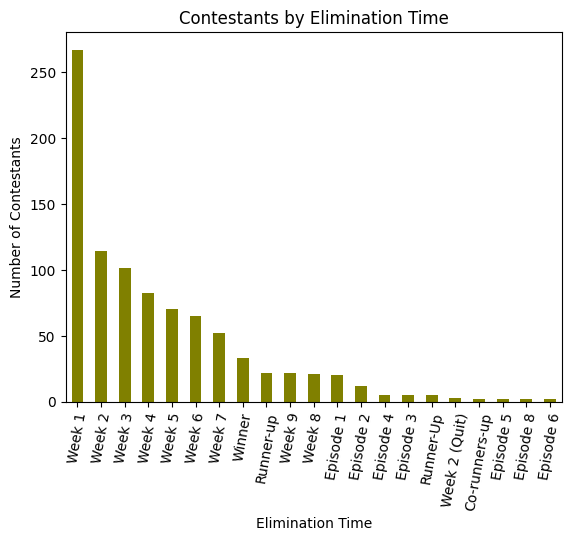

In [8]:
# plot Eliminated to see the distribution of eliminated contestants 
contestants['Eliminated'].value_counts().plot(kind='bar', color='olive')
plt.title("Contestants by Elimination Time")
plt.ylabel("Number of Contestants")
plt.xlabel("Elimination Time")
plt.xticks(rotation=80)
plt.show()

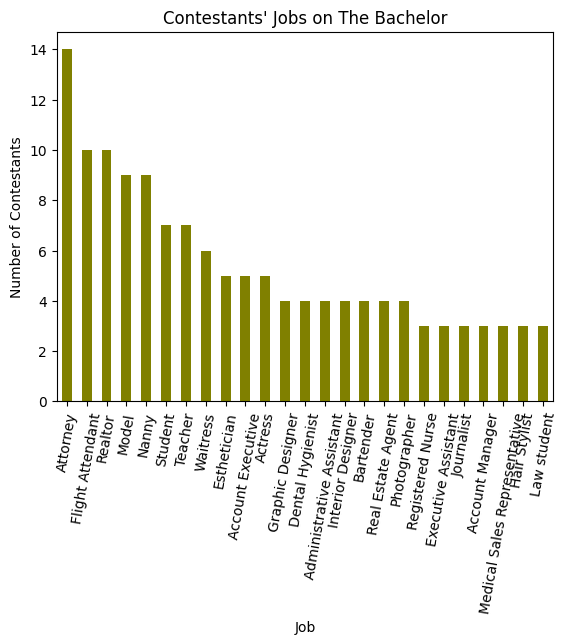

In [9]:
# plot the jobs to see the distribution of contestants' jobs (top 25) on The Bachelor 
contestants[contestants['Show'] == 'The Bachelor']['Job'].value_counts().head(25).plot(kind='bar', color='olive')
plt.title("Contestants' Jobs on The Bachelor")
plt.ylabel("Number of Contestants")
plt.xlabel("Job")
plt.xticks(rotation=80)
plt.show()

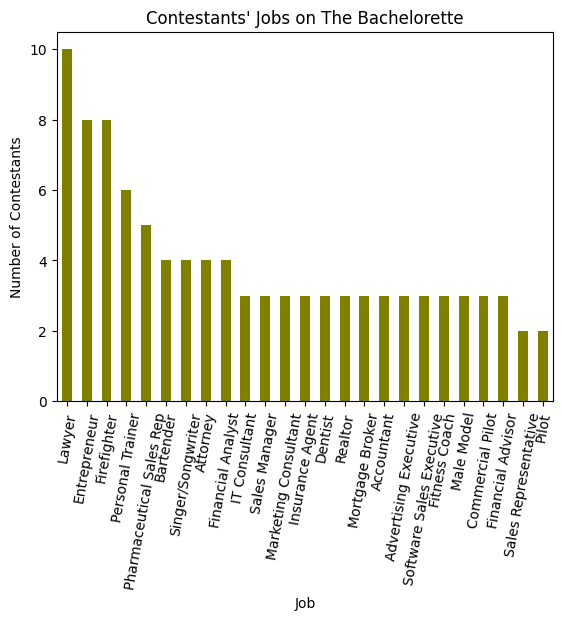

In [10]:
# plot the jobs to see the distribution of contestants' jobs (top 25) on The Bachelorette
contestants[contestants['Show'] == 'The Bachelorette']['Job'].value_counts().head(25).plot(kind='bar', color='olive')
plt.title("Contestants' Jobs on The Bachelorette")
plt.ylabel("Number of Contestants")
plt.xlabel("Job")
plt.xticks(rotation=80)
plt.show()

In [11]:
# other categorical columns (Name, Hometown, Job) have too many values 
# to plot succinctly - check for unique values
print("Number of unique names:", contestants['Name'].nunique())
print("Number of unique hometowns:", contestants['Hometown'].nunique())
print("Number of unique jobs:", contestants['Job'].nunique())

Number of unique names: 898
Number of unique hometowns: 606
Number of unique jobs: 610


<h4> Episodes EDA <h4>

In [12]:
# numerical columns: Season, No Overall, No in Season, Prod Code, US. Viewers (million), Rating
episodes.head()

,Show,Season,No Overall,No in Season,Title,Air Date,Prod Code,US. Viewers (millions),Rating / Share (18-49)
0,The Bachelor,1,1,1,"""Week 1""","March 25, 2002",101,9.9,4.0/0
1,The Bachelor,1,2,2,"""Week 2""","April 1, 2002",102,10.2,4.4/11
2,The Bachelor,1,3,3,"""Week 3""","April 8, 2002",103,9.4,4.2/10
3,The Bachelor,1,4,4,"""Week 4""","April 15, 2002",104,11.1,4.6/12
4,The Bachelor,1,5,5,"""Week 5""","April 22, 2002",105,13.1,5.7/14


In [13]:
#get num NA values in episodes
episodes.isna().sum()

Show                       0
Season                     0
No Overall                 0
No in Season               0
Title                      0
Air Date                   0
Prod Code                 68
US. Viewers (millions)     1
Rating / Share (18-49)     8
dtype: int64

In [14]:
#prod code will not be used and can just be dropped
#other columns have relatively small amount of NA values, just drop NA rows
episodes = episodes.drop(columns=['Prod Code'])
episodes = episodes.dropna()

In [15]:
#standardize ratings column
episodes['Rating'] = episodes['Rating / Share (18-49)'].str.split('/').str[0].str.strip()
episodes['Rating'] = episodes['Rating'].astype(float)

#remove quotes from title column
episodes['Title'] = episodes['Title'].str.replace('"', '')

#change air date to datetime
episodes['Air Date'] = pd.to_datetime(episodes['Air Date'])

#rename some columns for readability
episodes.rename(columns={'No Overall': 'Number Overall', 'No in Season': 'Number in Season', 'Prod Code': 'Production Code', 'US. Viewers (millions)': 'Viewers'}, inplace=True)

episodes.columns

Index(['Show', 'Season', 'Number Overall', 'Number in Season', 'Title',
       'Air Date', 'Viewers', 'Rating / Share (18-49)', 'Rating'],
      dtype='object')

In [16]:
# max Rating value seems too high - assuming a 5 star system,
# remove outliers greater than 5
episodes = episodes[episodes['Rating'] <= 5]

# look at the description of the numerical columns
episodes.describe()

,Season,Number Overall,Number in Season,Air Date,Viewers,Rating
count,368.000000,368.000000,368.000000,368,368.000000,368.000000
mean,12.524457,120.788043,6.062500,2012-06-26 12:27:23.478260992,7.920815,2.634239
min,1.000000,1.000000,1.000000,2002-03-25 00:00:00,4.260000,1.000000
25%,8.000000,69.750000,3.000000,2008-06-30 00:00:00,6.610000,1.900000
50%,12.000000,117.500000,6.000000,2012-10-14 12:00:00,7.880000,2.500000
75%,17.000000,164.250000,9.000000,2016-06-10 06:00:00,8.970000,3.300000
max,24.000000,251.000000,13.000000,2020-03-10 00:00:00,13.960000,5.000000
std,6.005851,63.074055,3.393198,NaN,1.719490,0.897573


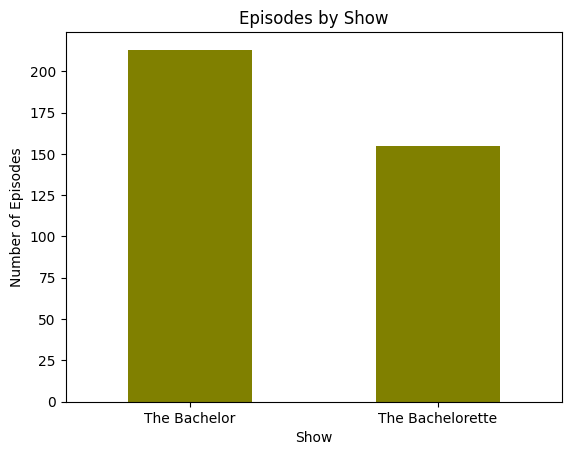

In [17]:
# look at categorical columns
# categorical columns: Show, Title, Air Date

# "Bachelorette" is mispelled in the data - fix it
episodes['Show'] = episodes['Show'].str.replace('Bechelorette', 'Bachelorette')

# plot the Show to see the distribution of episodes
episodes['Show'].value_counts().plot(kind='bar', color='olive')
plt.title("Episodes by Show")
plt.ylabel("Number of Episodes")
plt.xlabel("Show")
plt.xticks(rotation=360)
plt.show()

In [18]:
# other categorical columns (Title, Air Date) have too many values - check for unique values
print("Number of unique titles:", episodes['Title'].nunique())
print("Number of unique air dates:", episodes['Air Date'].nunique())

Number of unique titles: 128
Number of unique air dates: 347


<h2> Exploratory Q1 - Which version of the show has more viewers? <h2>

In [19]:
# group by show and get average rating for each
ratings = episodes.groupby('Show')['Viewers'].mean().reset_index()
ratings

,Show,Viewers
0,The Bachelor,8.456103
1,The Bachelorette,7.185226


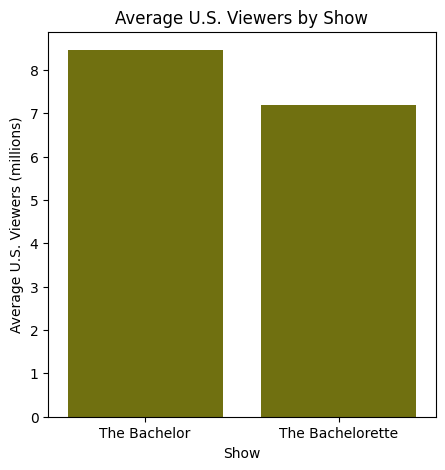

In [20]:
# plot the average rating for each show
plt.figure(figsize=(5,5))
sns.barplot(x='Show', y='Viewers', data=ratings, color='olive')
plt.title('Average U.S. Viewers by Show')
plt.ylabel('Average U.S. Viewers (millions)')
plt.xlabel('Show')
plt.show()

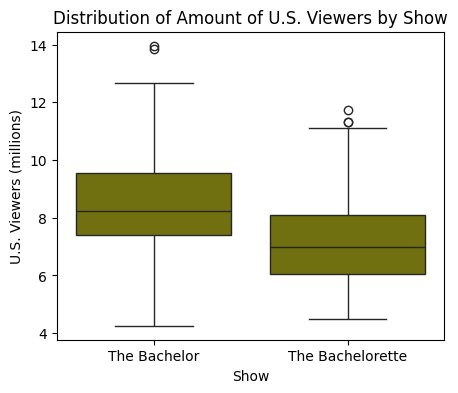

In [43]:
# show findings in a boxplot without grouping to see variation
plt.figure(figsize=(5, 4))
sns.boxplot(x='Show', y='Viewers', data=episodes, color='olive')
plt.title('Distribution of Amount of U.S. Viewers by Show')
plt.ylabel('U.S. Viewers (millions)')
plt.xlabel('Show')
plt.show()

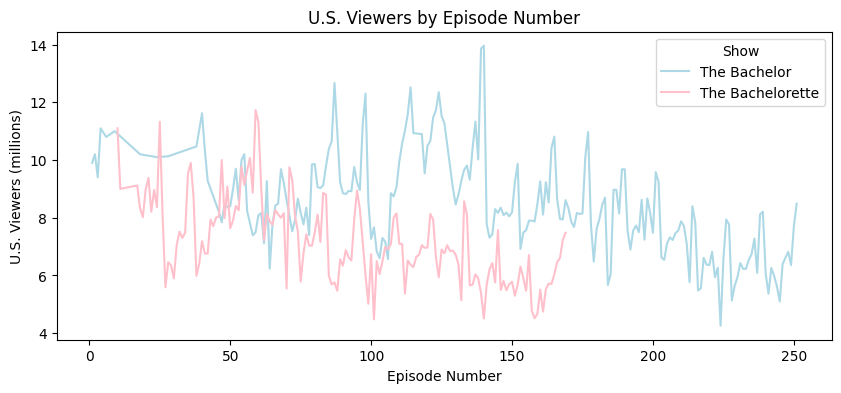

In [44]:
# get the viewers for each episode for each show and plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=episodes, x='Number Overall', y='Viewers', hue='Show', palette=['lightblue', 'pink'])
plt.title('U.S. Viewers by Episode Number')
plt.ylabel('U.S. Viewers (millions)')
plt.xlabel('Episode Number')
plt.show()

In [23]:
# get names of highest views for an episode for each show
max_viewers = episodes.groupby('Show')['Viewers'].idxmax()
episodes.loc[max_viewers]

,Show,Season,Number Overall,Number in Season,Title,Air Date,Viewers,Rating / Share (18-49),Rating
139,The Bachelor,15,140,12,Brad's After The Final Rose,2011-03-14,13.96,4.7/13,4.7
309,The Bachelorette,6,59,11,Week 10,2010-08-02,11.73,3.8/11,3.8


The bar chart shows that the overall average U.S. viewers by episode was higher for The Bachelor than The Bachelorette. A boxplot was then created using the entire distribution of viewers per show to show the variation in views for each. The Bachelorette has a much smaller spread, with about half the episodes having between 6 and 8 million viewers. It reached a high of about 21 million viewers. The Bachelor had about half of its episodes reach roughly 7-10 million viewers and reached a high of about 26 million viewers. These plots show significant differences between the average number of viewers for each show, portraying The Bachelor as much more popular than the Bachelorette. This makes sense, as The Bachelor has been running for a longer time and has more dedicated viewers. The most viewed episodes are typically right before finales, when the Bachelor/Bachelorette makes their crucial decision of the season. Altogether, views have declined over time/episodes.

<h2> Exploratory Q2 - Are age groups of contestants similar between The Bachelor and The Bachelorette? <h2>

In [24]:
# show numerical distribution by show
contestants.groupby('Show')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Show,,,,,,,,
The Bachelor,511.0,26.270059,2.744953,21.0,24.0,26.0,28.0,36.0
The Bachelorette,396.0,28.967172,2.997287,22.0,27.0,28.0,31.0,42.0


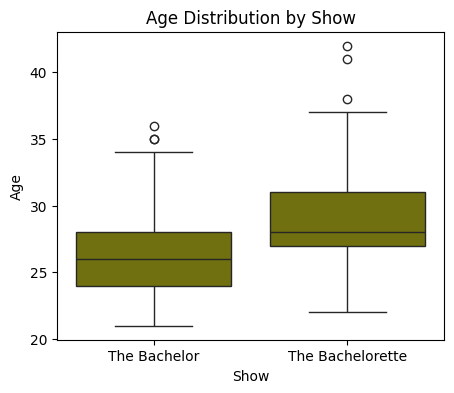

In [45]:
# plot age distribution by show
plt.figure(figsize=(5, 4))
sns.boxplot(x='Show', y='Age', data=contestants, color='olive')
plt.title('Age Distribution by Show')
plt.ylabel('Age')
plt.xlabel('Show')
plt.show()

In [26]:
# perform a t-test as well to statistically test age similarity
bachelor_ages = contestants[contestants['Show'] == 'The Bachelor']['Age'].dropna()
bachelorette_ages = contestants[contestants['Show'] == 'The Bachelorette']['Age'].dropna()

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(bachelor_ages, bachelorette_ages)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -14.096693825839143, P-Value: 6.082071342901385e-41


The difference in ages between The Bachelor and The Bachelorette contestants is statistically significant. In terms of our question, this means that the age of contestants on The Bachelor is statistically different from the age of contestants on The Bachelorette, with The Bachelorette contestants being older. The Bachelorette contestants were typically between 27 and 31, while The Bachelor contestants were typically between 24 and 28.

<h2> Exploratory Q3 - Are there geographical patterns in contestants' hometowns and do these shift between shows? <h2>

In [27]:
# merge the datasets

# make sure episodes has "Season" as int for proper merge
episodes['Season'] = episodes['Season'].astype(int)

# merge contestants and episodes on 'Season'
merged_df = pd.merge(contestants, episodes[['Show', 'Season', 'Air Date']], \
                     on=['Show', 'Season'], how='left')

# create a year column to analyze trends over the years
merged_df['Year'] = merged_df['Air Date'].dt.year

# drop duplicates
merged_df = merged_df.drop_duplicates(subset=['Name', 'Hometown', 'Year'])

# show the .head() of the df
merged_df.head()

,Show,Season,Name,Age,Hometown,Job,Eliminated,Air Date,Year
0,The Bachelor,1,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,Winner,2002-03-25,2002.0
5,The Bachelor,1,Trista Rehn,29.0,"Miami, Florida",Miami Heat Dancer,Runner-up,2002-03-25,2002.0
10,The Bachelor,1,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,Week 5,2002-03-25,2002.0
15,The Bachelor,1,Kim,24.0,"Tempe, Arizona",Nanny,Week 4,2002-03-25,2002.0
20,The Bachelor,1,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,Week 3,2002-03-25,2002.0


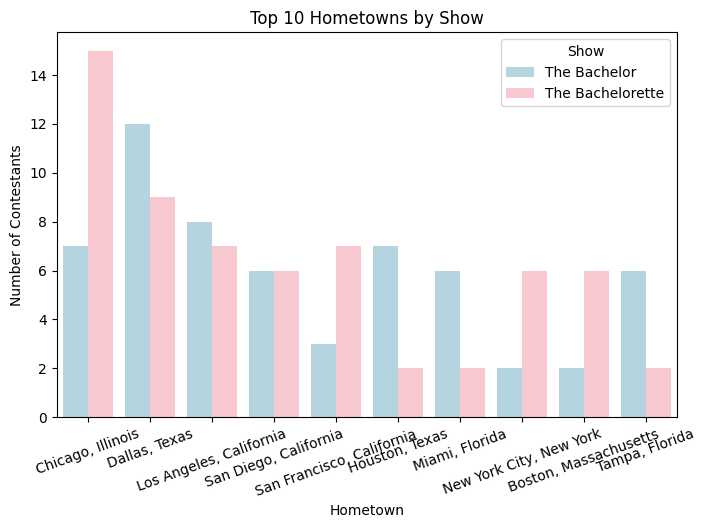

In [51]:
# look at the top 10 Hometowns by Show & visualize
top_hometowns = merged_df['Hometown'].value_counts().reset_index().iloc[:10]
top_hometowns.columns = ['Hometown', 'Count']
top_by_show = merged_df[merged_df['Hometown'].isin(top_hometowns['Hometown'])]

# plot findings
plt.figure(figsize=(8, 5))
sns.countplot(x='Hometown', hue='Show', \
              data=top_by_show, palette=['lightblue', 'pink'], \
                order=top_by_show['Hometown'].value_counts(ascending=False).index)
plt.title('Top 10 Hometowns by Show')
plt.ylabel('Number of Contestants')
plt.xlabel('Hometown')
plt.xticks(rotation=20)
plt.show()

In [29]:
# look at the top 10 states by show

# make a function to extract state from the hometown of the contestant
def extract_state(hometown):
    # Split based on ', ' and get the last element which is assumed to be the state
    if ',' in hometown:
        return hometown.split(', ')[-1].strip()
    else:
        return hometown

# apply function to "Hometown" column to make a new column ("State")
merged_df['State'] = merged_df['Hometown'].apply(extract_state)

# print the 10 most popular states
print("Top states: ", merged_df['State'].value_counts().head(10))

Top states:  State
California       158
Texas             73
Florida           68
Illinois          66
New York          46
Colorado          28
Michigan          27
Massachusetts     27
Ohio              26
New Jersey        21
Name: count, dtype: int64


In [30]:
# look at the unique values in "State"
merged_df["State"].unique()

# seems like some states still have "\xa0" and didn't split correctly-- let's fix that
# get the values in "State" that have \xa0 in them
still_have_xa0 = merged_df[merged_df['State'].str.contains('\xa0')]['State'].unique()

# split on the \xa0 and take the last element
merged_df['State'] = merged_df['State'].apply(lambda x: x.split("\xa0")[-1] if '\xa0' in x else x)
merged_df.head()

,Show,Season,Name,Age,Hometown,Job,Eliminated,Air Date,Year,State
0,The Bachelor,1,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,Winner,2002-03-25,2002.0,Kansas
5,The Bachelor,1,Trista Rehn,29.0,"Miami, Florida",Miami Heat Dancer,Runner-up,2002-03-25,2002.0,Florida
10,The Bachelor,1,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,Week 5,2002-03-25,2002.0,Texas
15,The Bachelor,1,Kim,24.0,"Tempe, Arizona",Nanny,Week 4,2002-03-25,2002.0,Arizona
20,The Bachelor,1,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,Week 3,2002-03-25,2002.0,Indiana


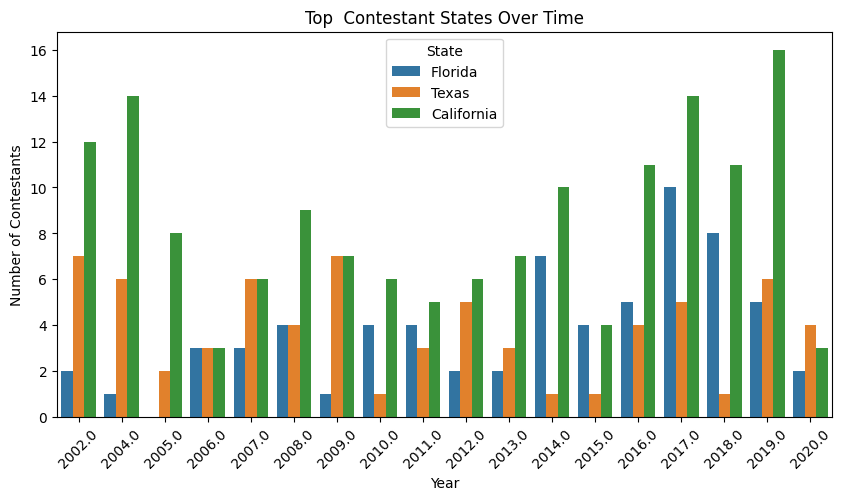

In [54]:
#get the top 3 most popular states/countries and plot each of their counts over time
top_states = merged_df['State'].value_counts().head(3).index
top_states_df = merged_df[merged_df['State'].isin(top_states)]
plt.figure(figsize=(10, 5))
sns.countplot(data=top_states_df, x='Year', hue='State', palette='tab10')
plt.title('Top  Contestant States Over Time')
plt.ylabel('Number of Contestants')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

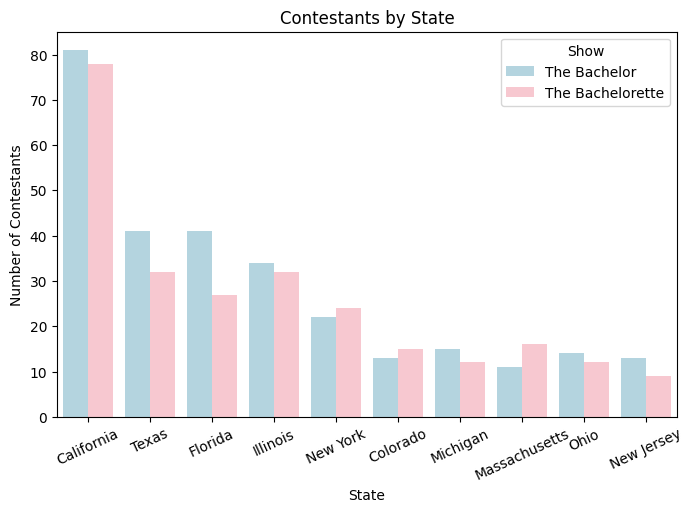

In [53]:
# do a visualization of the top 10 states per show and order the states by the number of contestants
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='State', hue='Show', \
              order=merged_df['State'].value_counts()[:10].index, \
                palette=['lightblue', 'pink'])
plt.title('Contestants by State')
plt.ylabel('Number of Contestants')
plt.xlabel('State')
plt.xticks(rotation=25)
plt.show()

Some contestants were not from the U.S., but their hometowns were not common enough to affect the top states that contestants came from in either show. Chicago and Dallas were the most common states for a contestant to be from, but California was the most common state. California was fairly common throughout each season, and the number of contestants from Texas stayed roughly consistent. The number of contestants from Florida slightly increased over time starting in 2014. After grouping states by show, California had the most by a significant amount, with Texas and Florida following behind. This plot does not seem to show a significant difference in common hometowns between shows.

<h2> Exploratory Q4 - Are there factors that are impacted by the Bachelor/Bachelorette, 
such as finding contestants with similar/different ages or professions? </h2>

In [33]:
# Logistic Regression: Predicting whether a contestant is on The Bachelorette based on age

# prep the data
contestants['Is_Bachelorette'] = (contestants['Show'] == 'The Bachelorette').astype(int)
X = contestants[['Age']].dropna()  # get the features
y = contestants['Is_Bachelorette'][X.index]  # get the corresponding label

# create the model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# print out the summary
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.586749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Is_Bachelorette   No. Observations:                  907
Model:                          Logit   Df Residuals:                      905
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.1435
Time:                        17:29:03   Log-Likelihood:                -532.18
converged:                       True   LL-Null:                       -621.37
Covariance Type:            nonrobust   LLR p-value:                 1.091e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2881      0.779    -11.922      0.000     -10.815      -7.761
Age            0.3284      0.

The coefficient for Age is negative, which means that as Age increases, the probability of being on The Bachelorette decreases.

The p-value is less than 0.05, which means that Age is a significant predictor of whether a contestant is on The Bachelorette.


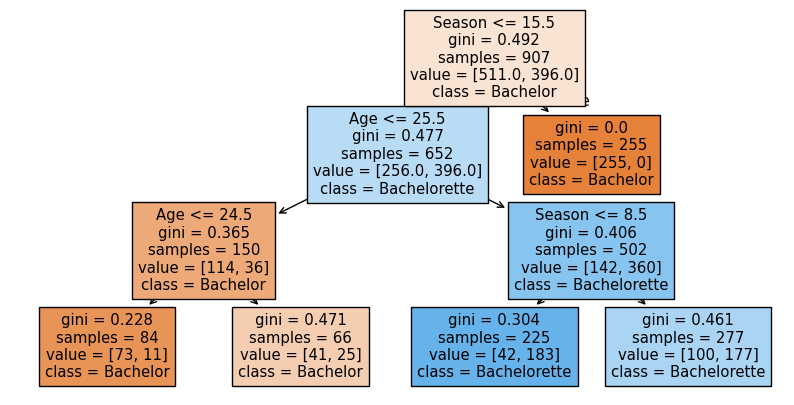

In [55]:
# Decision Tree example (considering multiple features, like Season and Age)
X_full = contestants[['Age', 'Season']].dropna()  # take multiple features for tree
y_full = contestants['Is_Bachelorette'][X_full.index]
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_full, y_full)

plt.figure(figsize=(10, 5))
plot_tree(tree_clf, feature_names=['Age', 'Season'], class_names=['Bachelor', 'Bachelorette'], filled=True)
plt.show()

After splitting on whether a Season is greater than or less than 15.5, as only The Bachelorette has less than 16 seasons, the Decision Tree splits on Age, meaning it finds Age to be the most important differentiating feature. Contestants with an Age less than or equal to 25.5 are determined to be on The Bachelor, while contestants more than 25.5 years old are determined to be on The Bachelorette. This shows that Age is a large factor in whether a contestant is more likely to be on either show.

<h2> EXTRA VISUALIZATIONS <h2>

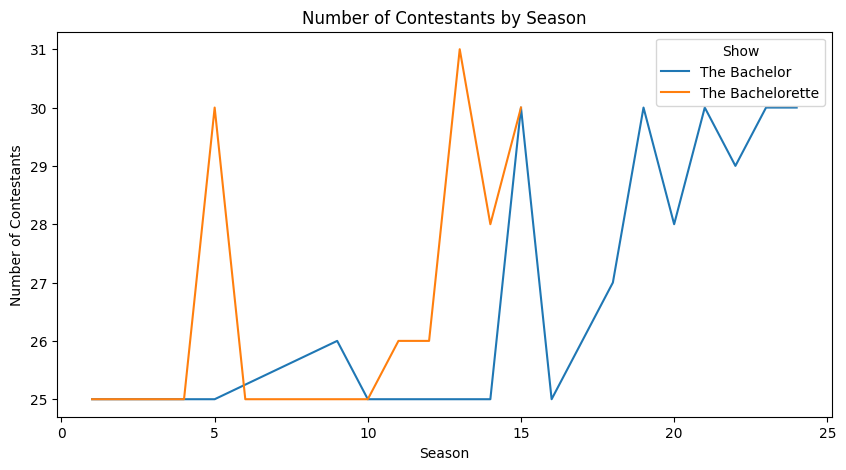

In [35]:
# change in # of contestants per season
contestants_by_season = contestants.groupby(['Season', 'Show']).size().reset_index(name='Number of Contestants')

# plot findings (one line per show)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Season', y='Number of Contestants', hue='Show', data=contestants_by_season)
plt.title('Number of Contestants by Season')
plt.ylabel('Number of Contestants')
plt.xlabel('Season')
plt.show()

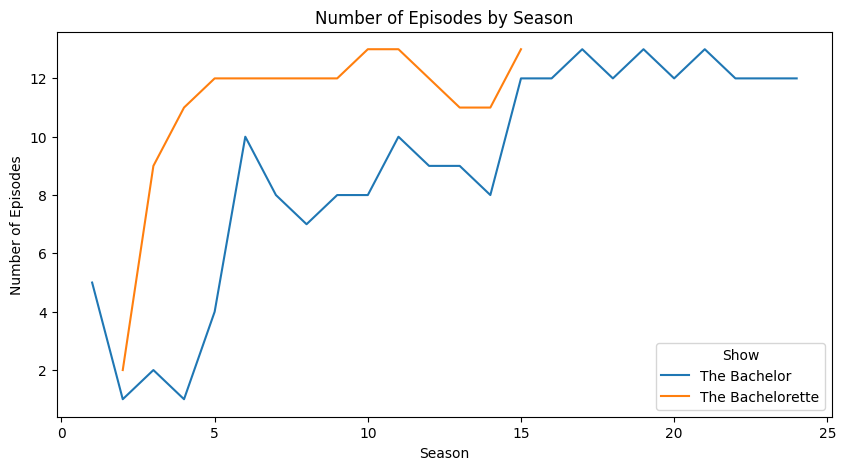

In [36]:
# change in # of eps per season
# group by season season per show and count number of episodes
episodes_by_season = episodes.groupby(['Season', 'Show']).size().reset_index(name='Number of Episodes')

#plot findings (one line per show)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Season', y='Number of Episodes', hue='Show', data=episodes_by_season)
plt.title('Number of Episodes by Season')
plt.ylabel('Number of Episodes')
plt.xlabel('Season')
plt.show()

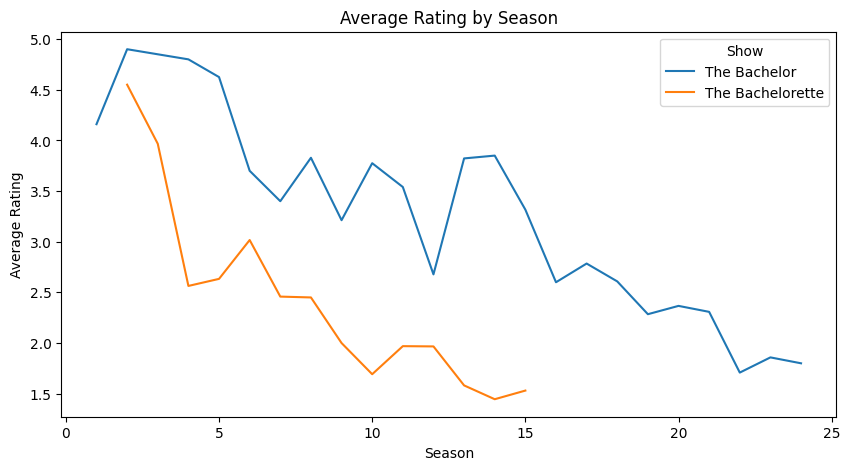

In [37]:
# change in ratings per season over time
# group by season per show and get average rating for each
ratings_by_season = episodes.groupby(['Season', 'Show'])['Rating'].mean().reset_index()

#plot findings (one line per show)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Season', y='Rating', hue='Show', data=ratings_by_season)
plt.title('Average Rating by Season')
plt.ylabel('Average Rating')
plt.xlabel('Season')
plt.show()

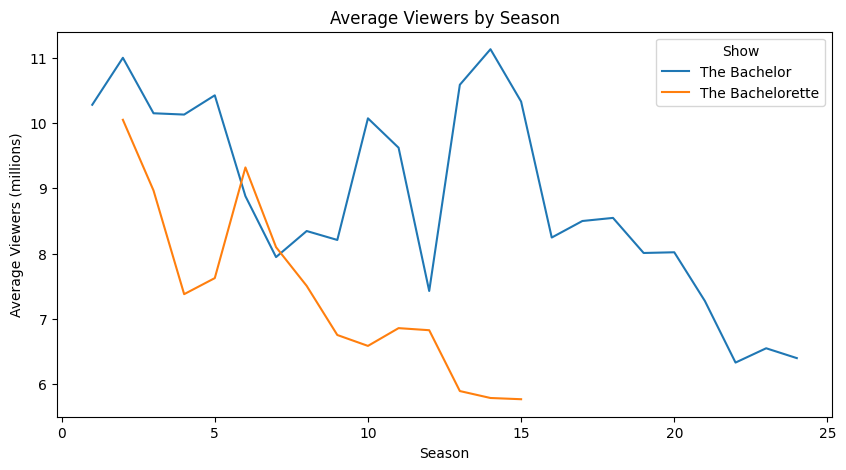

In [38]:
# change in # of viewers per season
# group by season per show and get average viewers for each
viewers_by_season = episodes.groupby(['Season', 'Show'])['Viewers'].mean().reset_index()

#plot findings (one line per show)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Season', y='Viewers', hue='Show', data=viewers_by_season)
plt.title('Average Viewers by Season')
plt.ylabel('Average Viewers (millions)')
plt.xlabel('Season')
plt.show()



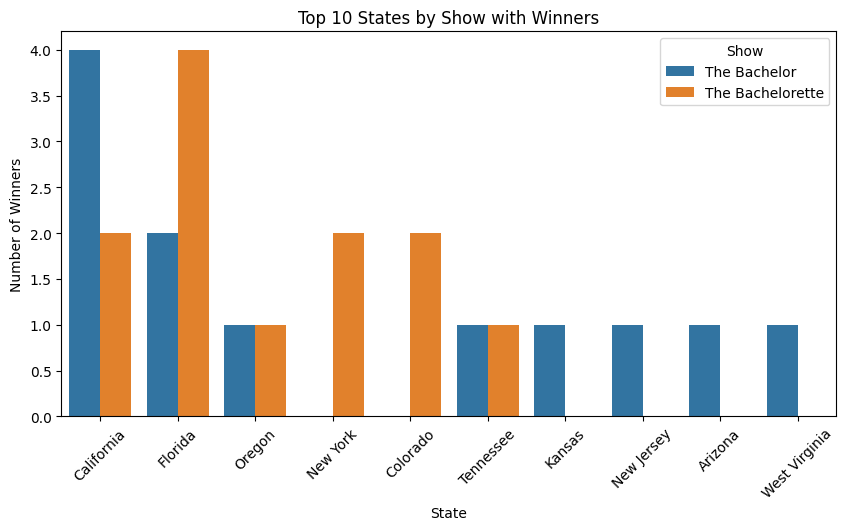

In [39]:

#8 is there any correlation with state and who wins?


# get the winners
winners = merged_df[merged_df['Eliminated'] == 'Winner']

# show the top 10 States by Show and sort by number of winners (highest to lowest)
plt.figure(figsize=(10, 5))
sns.countplot(x='State', hue='Show', data=winners[winners['State'].isin(winners['State'].value_counts().head(10).index)], order=winners['State'].value_counts().head(10).index)
plt.title('Top 10 States by Show with Winners')
plt.ylabel('Number of Winners')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()